In [8]:
'''Imports'''
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [9]:
'''GPU Check'''
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Devices:", tf.config.list_physical_devices())

Num GPUs Available: 1
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
'''Loading Data'''
def load_csv_data(path):
    df = pd.read_csv(path, delimiter=',')
    x = df.iloc[:, :-1].to_numpy(dtype=np.float32)  
    y = df.iloc[:, -1].to_numpy(dtype=np.float32)   
    return x, y

x_train, y_train = load_csv_data("../data/NN/train.csv")
x_val, y_val = load_csv_data("../data/NN/val.csv")
x_test, y_test = load_csv_data("../data/NN/test.csv")

In [11]:
'''Erly Stop'''
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=10,            
    restore_best_weights=True  
)

In [12]:
'''NN'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(x_train.shape[1], activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(4, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()





/home/tobi/Errors_Recognition/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
'''Learning'''
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0979 - loss: 1.0608 - val_accuracy: 0.1000 - val_loss: 0.9469
Epoch 2/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1032 - loss: 0.9131 - val_accuracy: 0.1000 - val_loss: 0.8266
Epoch 3/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1037 - loss: 0.8005 - val_accuracy: 0.1000 - val_loss: 0.7331
Epoch 4/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2123 - loss: 0.7137 - val_accuracy: 0.9000 - val_loss: 0.6600
Epoch 5/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.6445 - val_accuracy: 0.9000 - val_loss: 0.5996
Epoch 6/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.5854 - val_accuracy: 0.9000 - val_loss: 0.5456
Epoch 7/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9024 - loss: 0.5322 - val_accuracy: 0.9000 - val_loss: 0.4986
Epoch 8/100
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9012 - loss: 0.4878 - val_accu

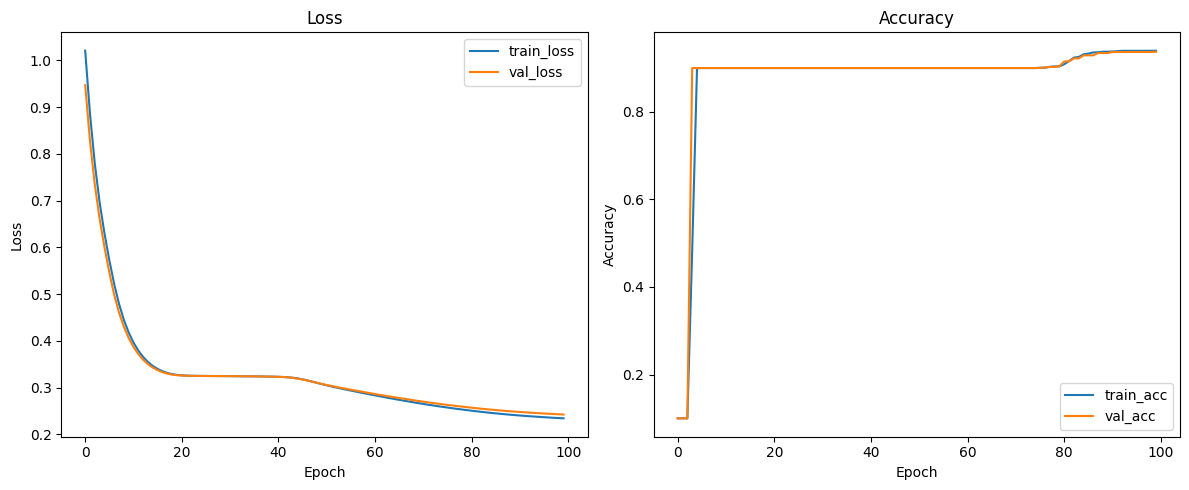

In [14]:
'''Graphs'''
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()